In [99]:
import fastbook
import torch
import numpy as np

In [100]:
fastbook.setup_book()

In [101]:
from fastai.vision.all import *

In [102]:
print(torch.cuda.is_available())

True


In [33]:
help(DataBlock)

Help on class DataBlock in module fastai.data.block:

class DataBlock(builtins.object)
 |  DataBlock(blocks=None, dl_type=None, getters=None, n_inp=None, item_tfms=None, batch_tfms=None, *, get_items=None, splitter=None, get_y=None, get_x=None)
 |  
 |  Generic container to quickly build `Datasets` and `DataLoaders`
 |  
 |  Methods defined here:
 |  
 |  __init__(self, blocks=None, dl_type=None, getters=None, n_inp=None, item_tfms=None, batch_tfms=None, *, get_items=None, splitter=None, get_y=None, get_x=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  dataloaders(self, source, path='.', verbose=False, **kwargs)
 |      Create a `DataLoaders` object from `source`
 |  
 |  datasets(self, source, verbose=False)
 |      Create a `Datasets` object from `source`
 |  
 |  new(self, item_tfms=None, batch_tfms=None)
 |      Create a new `DataBlock` with other `item_tfms` and `batch_tfms`
 |  
 |  summary(self: fastai.data.block.DataBlock, source, bs=4, sho

In [103]:
path = Path("D:\Pranav\Projects\Object_detection_RPS_Kaggle") 


In [104]:
impath = (path/"paper").ls()[0]
im = Image.open(impath)
im.size

(300, 200)

In [105]:
path.ls()

(#6) [Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/archive.zip'),Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/cv_try.ipynb'),Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/paper'),Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/README_rpc-cv-images.txt'),Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/rock'),Path('D:/Pranav/Projects/Object_detection_RPS_Kaggle/scissors')]

In [106]:
dbs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=4),
                 get_y= parent_label,
                 item_tfms=Resize(360,240),
                 batch_tfms=[*aug_transforms(size=224, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
dls = dbs.dataloaders(path, bs=16)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [107]:
x,y = dls.one_batch()
x.mean(dim=[0,2,3]),x.std(dim=[0,2,3])



(TensorImage([-0.4387,  0.5386, -0.4626], device='cuda:0'),
 TensorImage([1.2075, 0.4737, 0.6349], device='cuda:0'))

In [116]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)


D:\Pranav\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


D:\Pranav\Anaconda\envs\pytorch\lib\site-packages\fastai\callback\schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


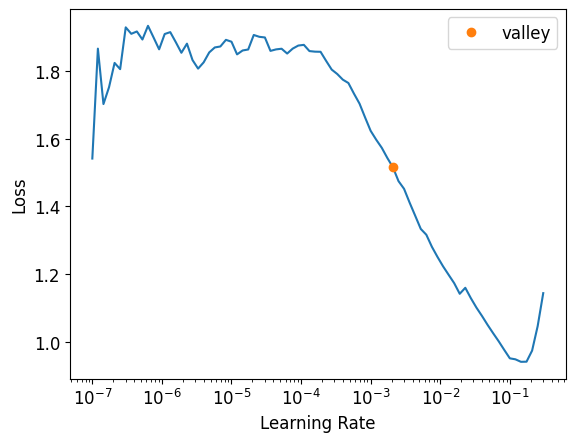

In [117]:
learn.lr_find()
plt.show()

In [118]:
learn.fit_one_cycle(3,5e-3)


epoch,train_loss,valid_loss,accuracy,time
0,0.210044,0.092688,0.979405,01:24
1,0.164458,0.028935,0.993135,00:58
2,0.058127,0.019144,0.995423,01:03


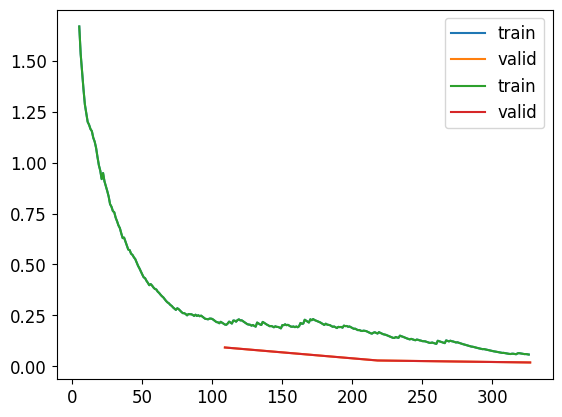

In [120]:
learn.recorder.plot_loss()
plt.show()